In [3]:

import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    "../data/BinaryBrainTumorDataset/Training",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    label_mode="binary",
    validation_split=0.3,
    subset="training",
    seed=123
)

val_dataset = image_dataset_from_directory(
    "../data/BinaryBrainTumorDataset/Training",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    label_mode="binary",
    validation_split=0.3,
    subset="validation",
    seed=123
)

Found 5712 files belonging to 2 classes.
Using 4570 files for training.
Found 5712 files belonging to 2 classes.
Using 1142 files for validation.


In [6]:
# Validate the number of images in training and validation datasets
train_count = sum([len(images) for images, _ in train_dataset])
val_count = sum([len(images) for images, _ in val_dataset])

print(f"Number of training images: {train_count}")
print(f"Number of validation images: {val_count}")


Number of training images: 4570
Number of validation images: 1142


2025-06-08 19:14:28.352304: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-06-08 19:14:28.478062: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


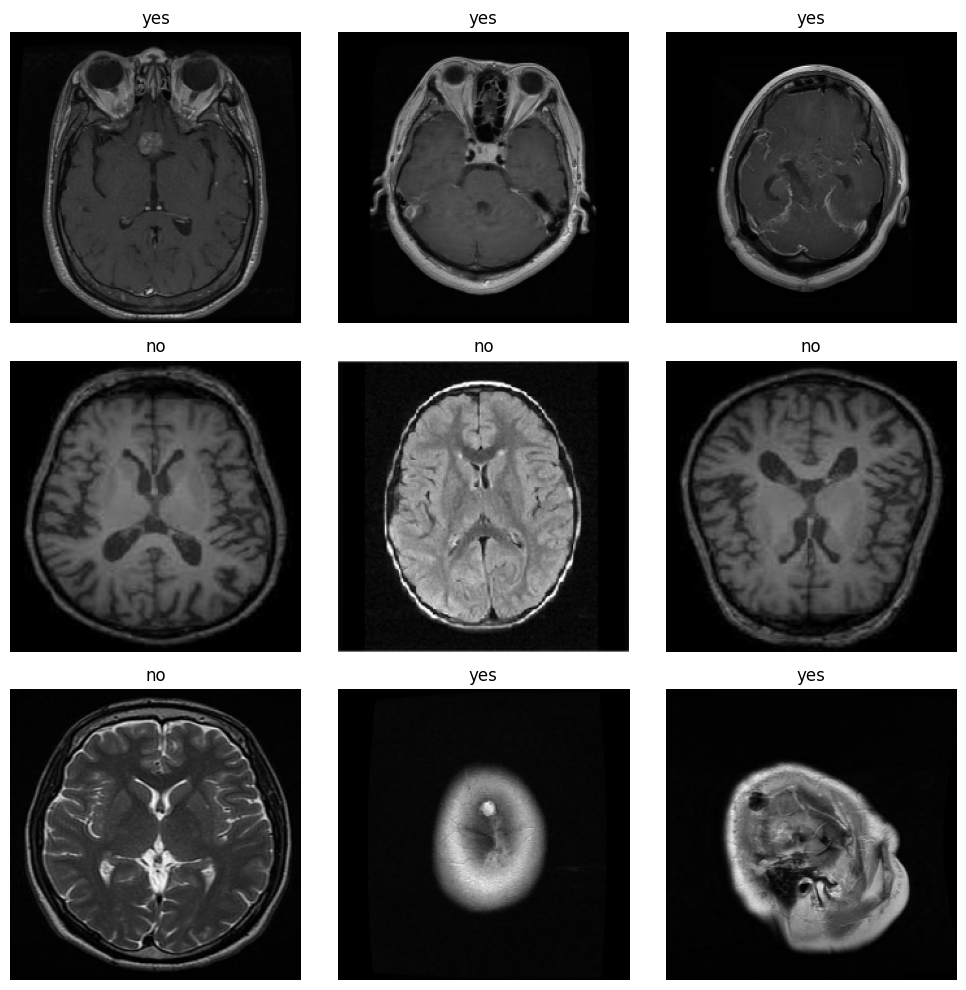

In [19]:
# Visualize some training images
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Convert from float [0,1] to uint8 [0,255] for proper display
        img = images[i].numpy().astype('uint8')
        plt.imshow(img)  # Remove cmap="gray" for RGB images
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [20]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/home/josip/Desktop/zavrsni rad/MRI-Image-Classification-for-Brain-Tumor-Detection-/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Alternative CNN model with BatchNormalization and more layers
from tensorflow.keras.layers import BatchNormalization

alt_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

alt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alt_model.summary()

/home/josip/Documents/ZavrsniRad/MRI-Image-Classification-for-Brain-Tumor-Detection-/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,249 (84.86 MB)

 Trainable params: 22,244,801 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


In [13]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[early_stop, checkpoint]
)

# Save the final model
model.save('final_model.keras') 

Epoch 1/100


I0000 00:00:1749402990.896140   20289 service.cc:152] XLA service 0x7e247c009740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749402990.896168   20289 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-06-08 19:16:30.914322: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749402991.047850   20289 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/143 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5148 - loss: 311.1007

I0000 00:00:1749402994.878697   20289 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8042 - loss: 85.1174 - val_accuracy: 0.9571 - val_loss: 0.1516
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9634 - loss: 0.1370 - val_accuracy: 0.9755 - val_loss: 0.0748
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9817 - loss: 0.0559 - val_accuracy: 0.9746 - val_loss: 0.1195
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9772 - val_loss: 0.1370
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.9720 - val_loss: 0.1614
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9904 - loss: 0.0342 - val_accuracy: 0.9702 - val_loss: 0.1302
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9900 - loss: 0.0372 - val_accuracy: 0.9658 - val_loss: 0.1382


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

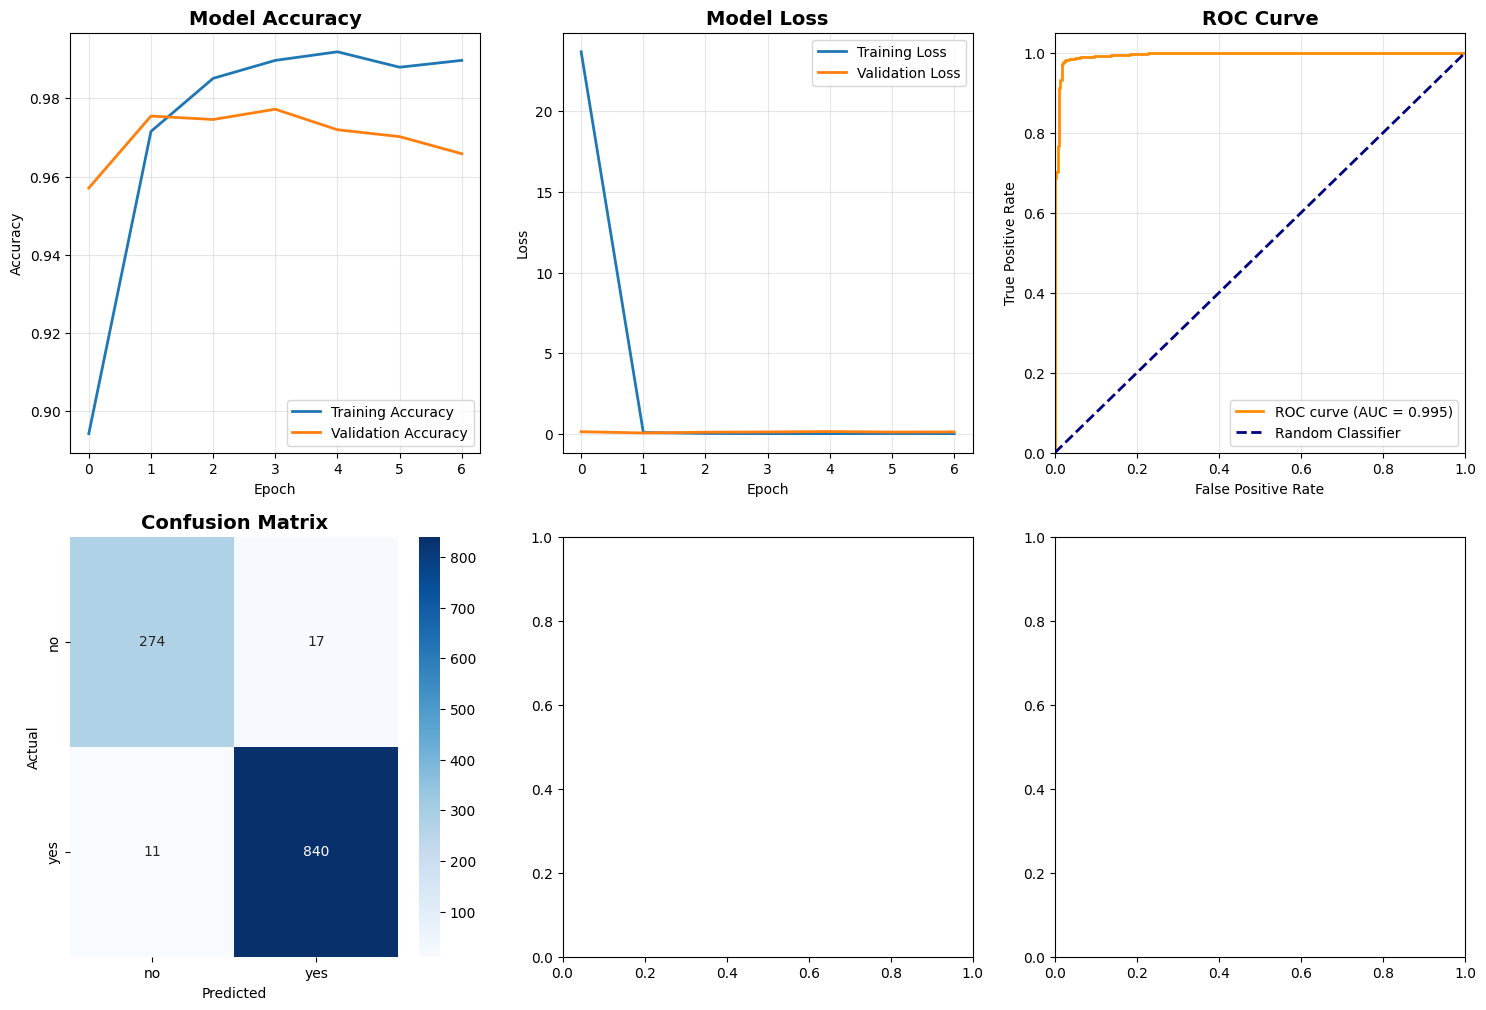

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import seaborn as sns

# Load the best model for evaluation
best_model = keras.models.load_model('best_model.keras')

# Get predictions on validation set
y_true = []
y_pred_proba = []
y_pred = []

for images, labels in val_dataset:
    predictions = best_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred_proba.extend(predictions.flatten())
    y_pred.extend((predictions > 0.5).astype(int).flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_proba = np.array(y_pred_proba)

# Calculate metrics
f1 = f1_score(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Training History - Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Training History - Loss
axes[0, 1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. ROC Curve
axes[0, 2].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0, 2].set_xlim([0.0, 1.0])
axes[0, 2].set_ylim([0.0, 1.05])
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0, 2].legend(loc="lower right")
axes[0, 2].grid(True, alpha=0.3)

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=train_dataset.class_names,
            yticklabels=train_dataset.class_names)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 5. Prediction Distribution - FIXED INDEXING
no_tumor_probs = y_pred_proba[y_true == 0]
tumor_probs = y_pred_proba[y_true == 1]

axes[1, 1].hist(no_tumor_probs, bins=30, alpha=0.7, label='No Tumor', color='blue')
axes[1, 1].hist(tumor_probs, bins=30, alpha=0.7, label='Tumor', color='red')
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', label='Threshold')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Metrics Summary
axes[1, 2].axis('off')

# Safe division for precision calculations
precision = cm[1,1]/(cm[1,1]+cm[0,1]) if (cm[1,1]+cm[0,1]) > 0 else 0
recall = cm[1,1]/(cm[1,1]+cm[1,0]) if (cm[1,1]+cm[1,0]) > 0 else 0
specificity = cm[0,0]/(cm[0,0]+cm[0,1]) if (cm[0,0]+cm[0,1]) > 0 else 0

metrics_text = f"""
EVALUATION METRICS

Accuracy: {(y_pred == y_true).mean():.4f}
F1 Score: {f1:.4f}
AUC-ROC: {roc_auc:.4f}

CONFUSION MATRIX
True Negatives: {cm[0,0]}
False Positives: {cm[0,1]}
False Negatives: {cm[1,0]}
True Positives: {cm[1,1]}

CLASSIFICATION METRICS
Precision: {precision:.4f}
Recall: {recall:.4f}
Specificity: {specificity:.4f}

FINAL TRAINING RESULTS
Training Accuracy: {history.history['accuracy'][-1]:.4f}
Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}
Training Loss: {history.history['loss'][-1]:.4f}
Validation Loss: {history.history['val_loss'][-1]:.4f}
"""

axes[1, 2].text(0.1, 0.95, metrics_text, transform=axes[1, 2].transAxes, 
                fontsize=12, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed classification report
print("="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, target_names=train_dataset.class_names))

# Print summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Model Performance:")
print(f"  • Accuracy: {(y_pred == y_true).mean():.4f}")
print(f"  • F1 Score: {f1:.4f}")
print(f"  • AUC-ROC: {roc_auc:.4f}")
print(f"  • Total Validation Samples: {len(y_true)}")
print(f"  • Correctly Classified: {(y_pred == y_true).sum()}")
print(f"  • Misclassified: {(y_pred != y_true).sum()}")

In [14]:
# Print final training and validation accuracy and loss
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9956
Final Validation Accuracy: 0.9764
Final Training Loss: 0.0156
Final Validation Loss: 0.1674


In [30]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Clear the current session and free GPU memory
K.clear_session()

# Force garbage collection
import gc
gc.collect()

# Reset TensorFlow's default graph
tf.keras.backend.clear_session()

# Vrednovanje modela
U ovoj ćeliji provodimo vrednovanje modela korištenjem ključnih pokazatelja: točnost, preciznost, F1 rezultat, matrica zabune i ROC krivulja. Ovi pokazatelji daju detaljan uvid u performanse modela na zadatku detekcije tumora mozga na MRI slikama.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import seaborn as sns

# Učitaj najbolji model
best_model = keras.models.load_model('best_model.keras')

# Dobij predikcije na validacijskom skupu
y_true = []
y_pred_proba = []
y_pred = []

for images, labels in val_dataset:
    predictions = best_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred_proba.extend(predictions.flatten())
    y_pred.extend((predictions > 0.5).astype(int).flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_proba = np.array(y_pred_proba)

# Izračunaj metrike
f1 = f1_score(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)
cm = confusion_matrix(y_true, y_pred)

# Prikaži ROC krivulju
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Prikaži matricu zabune
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.title('Matrica zabune')
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

# Ispiši detaljan izvještaj
print('Izvještaj o klasifikaciji:')
print(classification_report(y_true, y_pred, target_names=train_dataset.class_names))
print(f"Točnost: {(y_pred == y_true).mean():.4f}")
print(f"F1 rezultat: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

**Potencijalna poboljšanja:**
- Proširiti i uravnotežiti skup podataka.
- Primijeniti naprednije arhitekture (npr. transfer learning s ResNet, EfficientNet).
- Uvesti augmentaciju podataka.
- Optimizirati hiperparametre i koristiti regularizaciju.